In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


%config InlineBackend.figure_format = "svg"
%config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")
plt.rcParams["font.family"] = "Calibri"

In [2]:
score_save_dir = Path("results/Meta_Prot/score/")
held_out_training_score_df = pd.read_pickle(
    score_save_dir / "held_out_training_score_df.pkl"
)
held_out_testing_score_df = pd.read_pickle(
    score_save_dir / "held_out_testing_score_df.pkl"
)

score_metrics_df = pd.read_csv(
    "results/Meta_Prot/ScoreCombinationModels/LassoBased.csv"
)
# held_out_testing_score_df
score_metrics_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,N,N_case,N_control,method,group
0,0.804385,0.821834,0.788984,0.682146,0.691667,0.673859,0.508139,0.516648,0.499066,0.786859,0.816481,0.757786,0.675991,0.683431,0.667133,0.211892,0.237710,0.180409,11241,624.0,10617.0,RF + Prot + Meta + SomtRF + PRS,+ Prot + Meta + SomtRF + PRS
1,0.800389,0.812848,0.783799,0.711194,0.718373,0.702867,0.525171,0.533549,0.515782,0.754119,0.789158,0.723312,0.708621,0.715949,0.699986,0.218582,0.242001,0.188288,13954,789.0,13165.0,RF + Prot + Meta + PRS,+ Prot + Meta + PRS
2,0.787097,0.801686,0.772967,0.751801,0.759810,0.744055,0.542112,0.551154,0.531250,0.676282,0.710586,0.641188,0.756240,0.763615,0.748549,0.191625,0.215639,0.161181,11241,624.0,10617.0,RF + Prot + Meta + SomtRF,+ Prot + Meta + SomtRF
3,0.781351,0.795707,0.767326,0.741486,0.749125,0.734549,0.537523,0.545715,0.528467,0.685209,0.718546,0.654090,0.744855,0.751409,0.737808,0.197804,0.218074,0.175917,14007,791.0,13216.0,RF + Prot + Meta,+ Prot + Meta
4,0.779160,0.792707,0.766106,0.737845,0.744281,0.731675,0.535642,0.543885,0.526433,0.690265,0.725575,0.653852,0.740693,0.746948,0.733366,0.197054,0.219075,0.173357,14007,791.0,13216.0,RF + Prot,+ Prot
5,0.778410,0.797126,0.766542,0.738274,0.745202,0.731479,0.535625,0.545343,0.526904,0.687737,0.717761,0.653283,0.741298,0.748023,0.734921,0.196500,0.221657,0.175224,14007,791.0,13216.0,Meta + Prot,+ Prot
6,0.775035,0.791822,0.758629,0.665831,0.673509,0.658019,0.495944,0.504583,0.486631,0.754119,0.781321,0.723620,0.660539,0.668835,0.652461,0.173184,0.193541,0.148919,13954,789.0,13165.0,RF + PRS,+ PRS
7,0.773393,0.788254,0.757313,0.726779,0.735207,0.719053,0.528898,0.537015,0.518523,0.696587,0.725609,0.668969,0.728587,0.735508,0.721481,0.193665,0.218077,0.168007,14007,791.0,13216.0,Prot,base
8,0.764903,0.780737,0.748061,0.710930,0.717498,0.702429,0.518130,0.524422,0.511050,0.694058,0.733712,0.658752,0.711940,0.720028,0.704278,0.163292,0.182536,0.142775,14007,791.0,13216.0,RF + Meta,+ Meta
9,0.753555,0.771574,0.735678,0.593719,0.602115,0.584456,0.455210,0.464152,0.447401,0.806090,0.838096,0.772037,0.581238,0.591374,0.573139,0.144662,0.160373,0.126502,11241,624.0,10617.0,RF + SomtRF,+ SomtRF


In [72]:
methods = score_metrics_df["method"].tolist()

In [4]:
score = held_out_testing_score_df

## kdeplot

/tmp/ipykernel_6415/883303470.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_data["incident_cad"] = plt_data["incident_cad"].map({1: "CAD", 0: "Non-CAD"})
/tmp/ipykernel_6415/883303470.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.kdeplot(
/tmp/ipykernel_6415/883303470.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_data["incident_cad"] = plt_data["incident_cad"].map({1: "CAD", 0: "Non

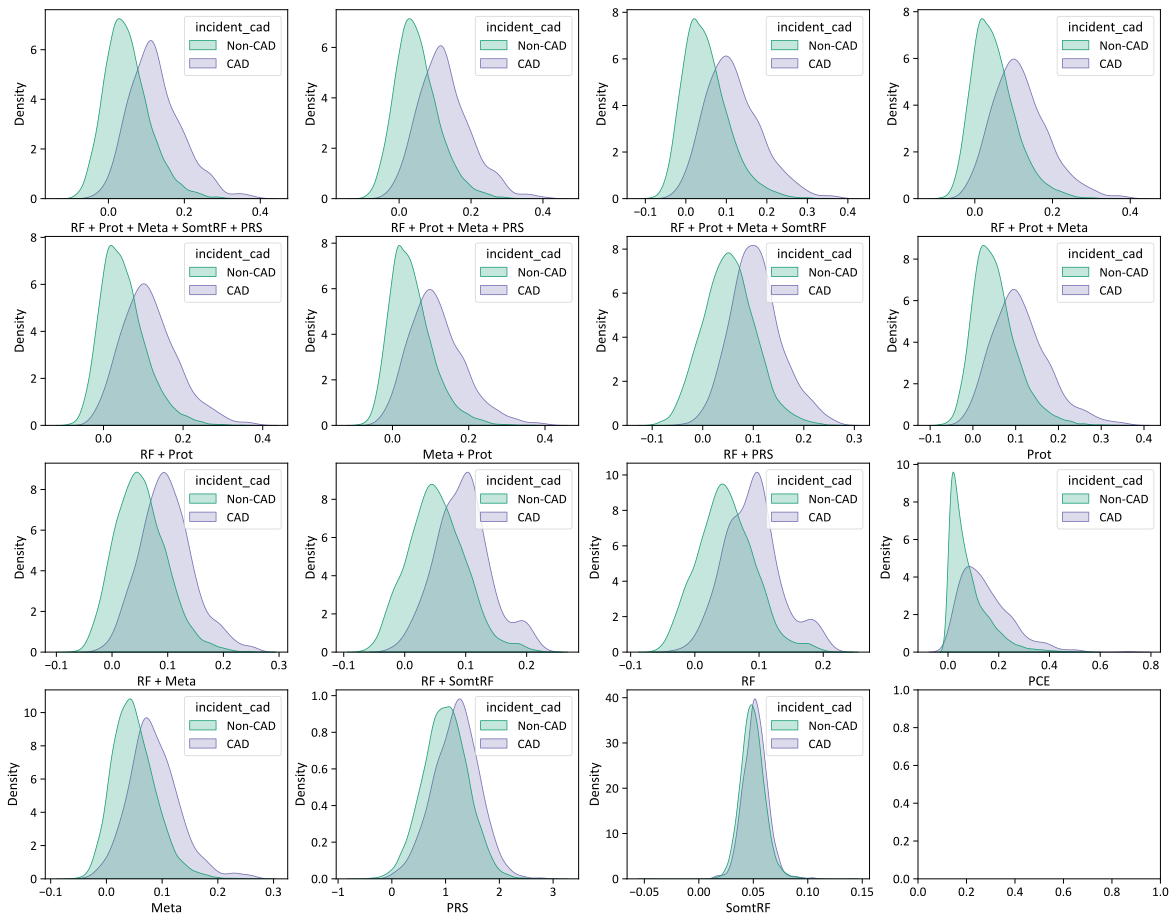

In [5]:
import seaborn as sns

colors = plt.get_cmap("Dark2")
row = len(methods) // 4 + 1
fig, axes = plt.subplots(row, 4, figsize=(20, row * 4))

axes = axes.flatten()
for idx, col in enumerate(methods):
    plt_data = score[[col, "incident_cad"]]
    plt_data["incident_cad"] = plt_data["incident_cad"].map({1: "CAD", 0: "Non-CAD"})
    sns.kdeplot(
        data=plt_data,
        x=col,
        ax=axes[idx],
        hue="incident_cad",
        common_norm=False,
        fill=True,
        # palette="nejm",
        palette=colors([0, 2]),
    )
    # ax = axes[idx]

    # axes[idx].hist(
    #     plt_data,
    #     x=col,
    #     # range=(0, 1),
    #     bins=10,
    #     label=col,
    #     # color=colors(idx),
    #     hue="incident_cad",
    # )

## plot
- 模型比较Forest Plot
- ROC
- 特征相关性图
- Calibration
- net benifit
- risk strat(百分比图)
- 生存分析

## 模型AUC比较ForestPlot

In [6]:
group_order = [
    "base",
    "+ PRS",
    "+ Meta",
    "+ Prot",
    "+ SomtRF",
    "+ Prot + Meta",
    "+ Prot + Meta + PRS",
    "+ Prot + Meta + SomtRF",
    "+ Prot + Meta + SomtRF + PRS",
]

In [7]:
for i in group_order:
    if i not in score_metrics_df["group"].unique().tolist():
        print(i)

In [8]:
score_metrics_df["group"].unique().tolist()

['+ Prot + Meta + SomtRF + PRS',
 '+ Prot + Meta + PRS',
 '+ Prot + Meta + SomtRF',
 '+ Prot + Meta',
 '+ Prot',
 '+ PRS',
 'base',
 '+ Meta',
 '+ SomtRF']

<Axes: xlabel='AUC'>

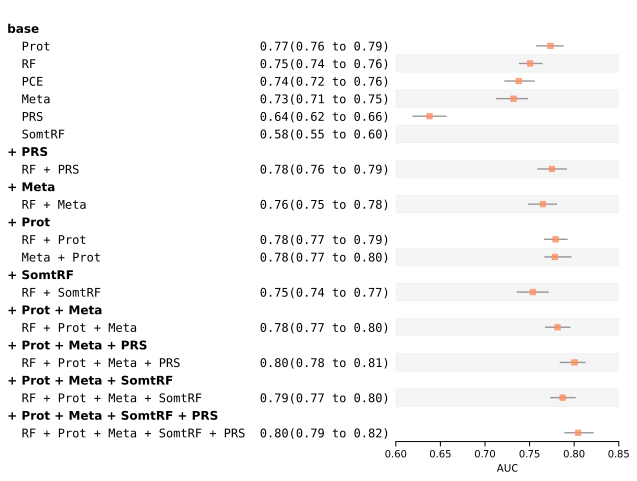

In [9]:
import forestplot as fp

fp.forestplot(
    score_metrics_df,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="method",
    ylabel="",
    xlabel="AUC",
    capitalize=True,
    table=True,
    sort=True,
    groupvar="group",
    group_order=group_order,
    color_alt_rows=True,
    xlim=(0.6, 0.85),
    # ax=ax,
    bbox_to_anchor=(0.5, 0.95),
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        # "offset": 0.3,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": "1",  # gray color for x-reference line
        "markercolor": sns.palettes.color_palette("Set2", 4)[
            1
        ],  # black color for markers
    },
)

## ROC

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


def split_method(x):
    split_x = x.split(" ")
    if len(split_x) == 1:
        return "base"
    else:
        return " ".join(x.split(" ")[1:])


roc_list = []
for method in methods:
    tmp = score[[method, "incident_cad"]].copy().dropna()

    fpr, tpr, _ = roc_curve(tmp["incident_cad"], tmp[method])

    roc_current_df = pd.DataFrame(
        [
            {
                "method": method,
                # "auc": auc(fpr, tpr),
                "fpr": fpr_,
                "tpr": tpr_,
            }
            for fpr_, tpr_ in zip(fpr, tpr)
        ]
    )
    roc_current_df["auc"] = auc(fpr, tpr)
    roc_current_df["group"] = roc_current_df["method"].apply(split_method)
    roc_list.append(roc_current_df)
    # break

roc_df = pd.concat(roc_list).reset_index(drop=True)
roc_df

,method,fpr,tpr,auc,group
0,RF + Prot + Meta + SomtRF + PRS,0.000000,0.000000,0.804385,+ Prot + Meta + SomtRF + PRS
1,RF + Prot + Meta + SomtRF + PRS,0.000000,0.001603,0.804385,+ Prot + Meta + SomtRF + PRS
2,RF + Prot + Meta + SomtRF + PRS,0.000000,0.006410,0.804385,+ Prot + Meta + SomtRF + PRS
3,RF + Prot + Meta + SomtRF + PRS,0.000094,0.006410,0.804385,+ Prot + Meta + SomtRF + PRS
4,RF + Prot + Meta + SomtRF + PRS,0.000094,0.011218,0.804385,+ Prot + Meta + SomtRF + PRS
...,...,...,...,...,...
19874,SomtRF,0.998305,0.996795,0.575138,base
19875,SomtRF,0.998305,0.998397,0.575138,base
19876,SomtRF,0.998964,0.998397,0.575138,base
19877,SomtRF,0.998964,1.000000,0.575138,base


<Axes: xlabel='fpr', ylabel='tpr'>

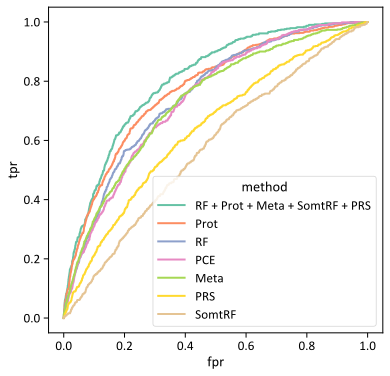

In [11]:
to_plot_group = [
    "base",
    # "+ PRS",
    # "+ Meta",
    # "+ Prot",
    # "+ SomtRF",
    # "+ Prot + Meta",
    # "+ Prot + Meta + PRS",
    # "+ Prot + Meta + SomtRF",
    "+ Prot + Meta + SomtRF + PRS",
]
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(
    data=roc_df.query("group in @to_plot_group"),
    x="fpr",
    y="tpr",
    hue="method",
    lw=2,
    palette=sns.palettes.color_palette("Set2"),
    estimator=None,
    ax=ax,
)

## 特征相关图

In [12]:
to_extract_group = [
    "base",
    "+ Prot + Meta + SomtRF + PRS",
]
to_extract_method = (
    score_metrics_df.query("group in @to_extract_group")["method"].unique().tolist()
)
RF = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "sbp_a",
    "BMI",
    "smoking",
    "prevalent_diabetes",
]
to_comapre_corr = ["future_cad_time_years", *RF, *to_extract_method]

to_comapre_corr

['future_cad_time_years',
 'age',
 'sex',
 'ldl_a',
 'hdl_a',
 'tc_a',
 'tg_a',
 'sbp_a',
 'BMI',
 'smoking',
 'prevalent_diabetes',
 'RF + Prot + Meta + SomtRF + PRS',
 'Prot',
 'RF',
 'PCE',
 'Meta',
 'PRS',
 'SomtRF']

In [13]:
corr_df = held_out_training_score_df

<Axes: >

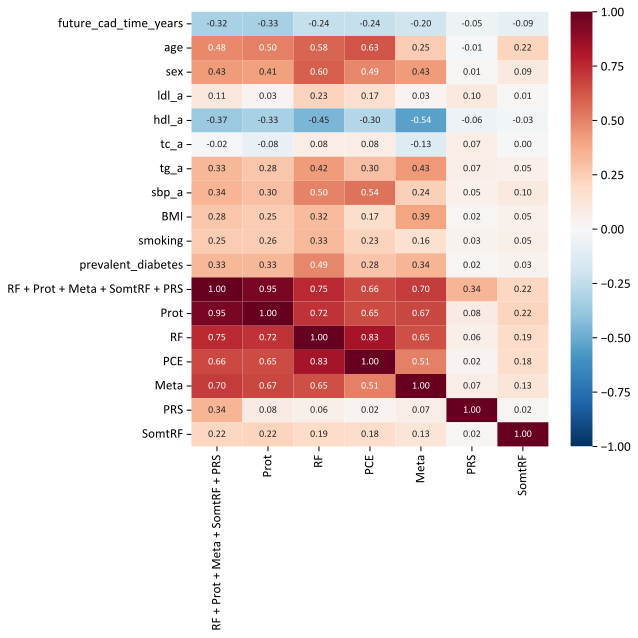

In [14]:
corr_matrix = corr_df[to_comapre_corr].corr().loc[to_extract_method]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(
    corr_matrix.T,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    ax=ax,
    annot=True,
    fmt=".2f",
    # square=True,
)

## calibration

In [15]:
train_score = held_out_training_score_df.reset_index(drop=False)
score = held_out_testing_score_df.reset_index(drop=False)

In [106]:
from sklearn.calibration import (
    CalibratedClassifierCV,
    CalibrationDisplay,
    calibration_curve,
)

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression


def calibration_score(raw_train_pred, raw_test_pred, train_y, method="isotonic"):
    if method == "isotonic":
        ir = IsotonicRegression(out_of_bounds="clip")
        ir.fit(raw_train_pred, train_y)

        pred_train_calibrated = ir.predict(raw_train_pred)
        pred_test_calibrated = ir.predict(raw_test_pred)
    elif method == "logitstic":
        lr = LogisticRegression(
            # class_weight="balanced",
            max_iter=5000,
            random_state=123,
        )
        raw_train_pred = (
            raw_train_pred.values
            if isinstance(raw_train_pred, pd.Series)
            else raw_train_pred
        )
        raw_test_pred = (
            raw_test_pred.values
            if isinstance(raw_test_pred, pd.Series)
            else raw_test_pred
        )
        lr.fit(raw_train_pred.reshape(-1, 1), train_y)
        pred_train_calibrated = lr.predict_proba(raw_train_pred.reshape(-1, 1))[:, 1]
        pred_test_calibrated = lr.predict_proba(raw_test_pred.reshape(-1, 1))[:, 1]
    else:
        raise ValueError("method should be isotonic or logitstic")

    return pred_train_calibrated, pred_test_calibrated


# method = "LR"
from scipy.stats import logistic

calibration_method = "logitstic"  # "logitstic" or "isotonic" or False


for method in methods:
    print(f"model: {method}, with {calibration_method} calibration")

    for_calibration_train_df = train_score[["eid", "incident_cad", method]].dropna()
    for_calibration_test_df = score[["eid", "incident_cad", method]].dropna()

    pred_train_calibrated, pred_test_calibrated = calibration_score(
        raw_train_pred=for_calibration_train_df[method],
        raw_test_pred=for_calibration_test_df[method],
        train_y=for_calibration_train_df["incident_cad"],
        method=calibration_method,
    )
    # score[f"{method}:calibrated"] = pred_test_calibrated
    if f"{method}:calibrated" in score.columns:
        score.drop(columns=[f"{method}:calibrated"], inplace=True)

    # train_score[f"{method}:calibrated"] = pred_train_calibrated
    # score[f"{method}:calibrated"] = pred_test_calibrated
    pred_res_df = pd.DataFrame(
        {
            "eid": for_calibration_test_df.eid.reset_index(drop=True),
            f"{method}:calibrated": pred_test_calibrated,
        }
    )

    score = score.merge(pred_res_df, on="eid", how="left")


calibrated_cols = [i for i in score.columns if "calibrated" in i]

model: RF + Prot + Meta + SomtRF + PRS, with logitstic calibration
model: RF + Prot + Meta + PRS, with logitstic calibration
model: RF + Prot + Meta + SomtRF, with logitstic calibration
model: RF + Prot + Meta, with logitstic calibration
model: RF + Prot, with logitstic calibration
model: Meta + Prot, with logitstic calibration
model: RF + PRS, with logitstic calibration
model: Prot, with logitstic calibration
model: RF + Meta, with logitstic calibration
model: RF + SomtRF, with logitstic calibration
model: RF, with logitstic calibration
model: PCE, with logitstic calibration
model: Meta, with logitstic calibration
model: PRS, with logitstic calibration
model: SomtRF, with logitstic calibration


In [107]:
def plot_calibration_score(
    data,
    fraction_of_positives="fraction_of_positives",
    mean_predicted_value="mean_predicted_value",
    ax=None,
    hue=None,
    **kwargs,
):
    if ax is None:
        fig, ax = plt.subplots()
    up_bd = max([max(data[fraction_of_positives]), max(data[mean_predicted_value])])

    sns.lineplot(
        data=data,
        x=mean_predicted_value,
        y=fraction_of_positives,
        ax=ax,
        hue=hue,
        **kwargs,
    )

    ax.set(
        title="Calibration plot",
        xlabel="Mean predicted value",
        ylabel="Fraction of positives",
    )

    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ax.set_xlim(0, up_bd)
    ax.set_ylim(0, up_bd)
    ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center")
    return ax


def split_method(x):
    split_x = x.split(" ")
    if len(split_x) == 1:
        return "base"
    else:
        return " ".join(x.split(" ")[1:])

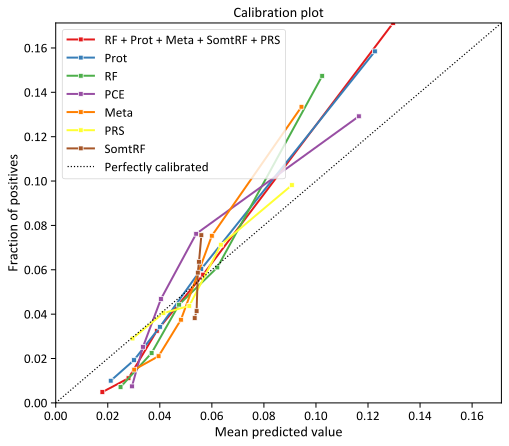

In [117]:
n_bins = 5
strategy = "quantile"
pos_label = 1

res_list = []
for method in methods:
    to_cal = score[
        ["eid", "incident_cad", f"{method}", f"{method}:calibrated"]
    ].dropna()
    y_true = to_cal["incident_cad"]
    y_prob = to_cal[f"{method}:calibrated"]

    pos_label_validated, name = CalibrationDisplay._validate_from_predictions_params(
        y_true, y_prob, sample_weight=None, pos_label=pos_label
    )

    prob_true, prob_pred = calibration_curve(
        y_true, y_prob, n_bins=n_bins, strategy=strategy, pos_label=pos_label
    )
    res = pd.DataFrame({"prob_true": prob_true, "prob_pred": prob_pred, "name": method})
    res_list.append(res)
calibration_df = pd.concat(res_list)

calibration_df["group"] = calibration_df["name"].apply(split_method)


fig, ax = plt.subplots(1, 1, figsize=(8, 7))


# for i, group in enumerate():
# ax = axes[i]
need_group = ["base", "+ Prot + Meta + SomtRF + PRS"]

plot_calibration_score(
    calibration_df.query("group in @need_group"),
    fraction_of_positives="prob_true",
    mean_predicted_value="prob_pred",
    hue="name",
    palette="Set1",
    lw=2,
    ax=ax,
    **{"marker": "s", "linestyle": "-"},
    # style="group",
)
ax.legend(loc="upper left")

## net benifit

In [19]:
net_benifit_group_need = ["base", "+ Prot + Meta + SomtRF + PRS"]

Text(0, 0.5, 'Net benefit (%)')

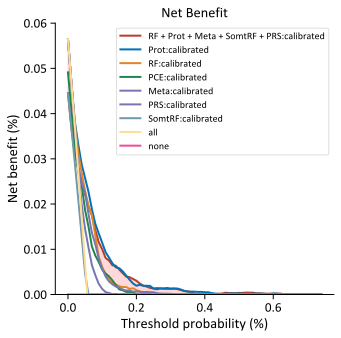

In [120]:
from ppp_prediction.net_benifit import plot_graphs
from dcurves import dca
import numpy as np


dca_famhistory_df = dca(
    data=score.dropna(subset=["incident_cad"]),
    outcome="incident_cad",
    modelnames=[
        f"{i}:calibrated"
        for i in calibration_df.query("group in @net_benifit_group_need")["name"]
        .unique()
        .tolist()
    ],
    # prevalence=0.05,
    thresholds=np.arange(0, 0.75, 0.01),
)
# dca_famhistory_df
fig, ax = plt.subplots(figsize=(5, 5))
plot_graphs(
    plot_df=dca_famhistory_df,
    graph_type="net_benefit",
    y_limits=[0, 0.06],
    ax=ax,
    line_kwargs={"lw": 2},
    show_grid=False,
    color_names="nejm",
    smooth_frac=0,
)
ax.set_title("Net Benefit")

y1 = "RF:calibrated"
y2 = "RF + Prot + Meta + SomtRF + PRS:calibrated"

thresholds = [i.get_data()[0] for i in ax.lines if i.get_label() == y1][0]
y1 = [i.get_data()[1] for i in ax.lines if i.get_label() == y1][0]
y2 = [i.get_data()[1] for i in ax.lines if i.get_label() == y2][0]

ax.fill_between(thresholds, y1, y2, color="red", alpha=0.15)
ax.legend(prop={"size": 10})

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Threshold probability (%)")
ax.set_ylabel("Net benefit (%)")


# to_plot_region = dca_famhistory_df[dca_famhistory_df["net_benefit"] > 0]

# to_plot_region

In [21]:
dca_famhistory_df

,model,threshold,n,prevalence,harm,test_pos_rate,tp_rate,fp_rate,net_benefit,net_intervention_avoided
0,RF + Prot + Meta + SomtRF + PRS:calibrated,0.00,14007,0.056472,0.0,0.770401,0.044549,0.725851,0.044549,-inf
1,RF + Prot + Meta + SomtRF + PRS:calibrated,0.01,14007,0.056472,0.0,0.667523,0.044121,0.623403,0.037824,-0.902620
2,RF + Prot + Meta + SomtRF + PRS:calibrated,0.02,14007,0.056472,0.0,0.479974,0.041979,0.437995,0.033040,-0.204612
3,RF + Prot + Meta + SomtRF + PRS:calibrated,0.03,14007,0.056472,0.0,0.421361,0.040123,0.381238,0.028332,0.033674
4,RF + Prot + Meta + SomtRF + PRS:calibrated,0.04,14007,0.056472,0.0,0.282644,0.035125,0.247519,0.024812,0.183694
...,...,...,...,...,...,...,...,...,...,...
670,none,0.70,14007,0.056472,0.0,0.000000,0.000000,0.000000,0.000000,0.919326
671,none,0.71,14007,0.056472,0.0,0.000000,0.000000,0.000000,0.000000,0.920462
672,none,0.72,14007,0.056472,0.0,0.000000,0.000000,0.000000,0.000000,0.921567
673,none,0.73,14007,0.056472,0.0,0.000000,0.000000,0.000000,0.000000,0.922641


## risk strat(百分比图)

In [22]:
risk_strat_group_need = ["base", "+ Prot + Meta + SomtRF + PRS"]

In [30]:
# from ppp_prediction.viz import calibration_dot_plot
import statsmodels.api as sm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy.stats import bootstrap


def calibration_curve_df(y_true, y_pred, k=10, n_resample=1000):
    plt_df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred})

    plt_df["y_pred_rank"] = plt_df["y_pred"].rank(
        pct=True, na_option="keep", ascending=True, method="average"
    )

    bins_start = np.linspace(0, 1, k + 1)
    bins_end = np.linspace(0, 1, k + 1)[1:]
    bins_labels = [f"{i:.0%}-{j:.0%}" for i, j in zip(bins_start, bins_end)]

    plt_df["y_pred_bins"] = pd.cut(
        plt_df["y_pred_rank"],
        bins=k,
        labels=bins_labels,
        include_lowest=True,
    )

    if not n_resample:
        plt_df_group = (
            plt_df.groupby("y_pred_bins")
            .apply(lambda x: pd.Series({"mean_y_true": x.y_true.mean()}))
            .reset_index(drop=False)
        )
    else:
        # 定义一个函数来计算均值
        def mean_bootstrap(data):
            # 使用bootstrap计算均值的置信区间
            res = bootstrap(data=(data,), statistic=np.mean, n_resamples=n_resample)

            return (
                np.mean(data),
                res.confidence_interval.low,
                res.confidence_interval.high,
            )

        # 对每个分位数进行bootstrap抽样

        plt_df_group = (
            plt_df.groupby("y_pred_bins")
            .apply(
                lambda x: pd.Series(
                    list(mean_bootstrap(x["y_true"])) + [x["y_pred"].mean()],
                    index=["mean_true", "ci_low", "ci_high", "mean_pred"],
                ).T
            )
            .reset_index(drop=False)
        )

    return plt_df_group


def _calibration_curve_plot(
    y_true, y_pred, k=10, n_resample=1000, offset=0, color="black", ax=None, label=None
):
    plt_df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}).dropna()

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    _plt_data = calibration_curve_df(
        plt_df["y_true"], plt_df["y_pred"], k=k, n_resample=n_resample
    )
    x = np.arange(len(_plt_data["y_pred_bins"])) + offset
    ax.errorbar(
        x=x,
        y=_plt_data["mean_true"],
        yerr=[
            _plt_data["mean_true"] - _plt_data["ci_low"],
            _plt_data["ci_high"] - _plt_data["mean_true"],
        ],
        fmt="o",
        marker="o",
        mfc=color,
        color=color,
        capsize=4,
        label=label,
    )
    # y_lowess = sm.nonparametric.lowess(_plt_data["mean_true"], x, frac=0.5)
    # ax.plot(y_lowess[:, 0], y_lowess[:, 1], color=color, linestyle="--")
    # sns.lineplot

    ax.set_xticks(np.arange(len(_plt_data["y_pred_bins"])))
    ax.set_xticklabels(_plt_data["y_pred_bins"])
    return ax


def calibration_dot_plot(
    y_true,
    y_pred,
    data,
    hue=None,
    hue_order=None,
    ax=None,
    color=None,
    k=10,
    n_resample=1000,
    offset=0.2,
):

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    if hue:
        hue_order = hue_order if hue_order is not None else data[hue].unique()
        offset_list = np.linspace(-offset, offset, len(hue_order))
        for idx in range(len(hue_order)):
            current_data = data[data[hue] == hue_order[idx]]
            color = (
                color
                if color is not None
                else sns.palettes.color_palette("Set1", len(hue_order))
            )

            _calibration_curve_plot(
                current_data[y_true],
                current_data[y_pred],
                k=k,
                n_resample=n_resample,
                offset=offset_list[idx],
                color=color[idx] if hasattr(color, "__iter__") else color,
                ax=ax,
                label=hue_order[idx],
            )

    else:
        _calibration_curve_plot(
            data[y_true],
            data[y_pred],
            k=k,
            n_resample=n_resample,
            offset=0,
            color=color,
            ax=ax,
            label=y_pred,
        )

    ax.legend(loc="upper left")

    ax.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Risk Score Decile", fontsize=12)
    ax.set_ylabel("Observed Event Rate", fontsize=12)
    return ax

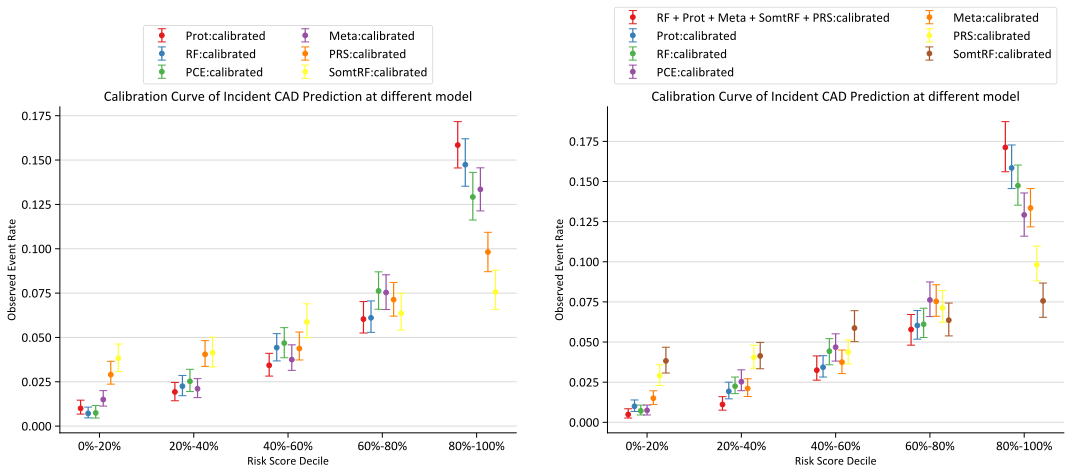

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
k = 5

## fig1
plt_group = ["base"]
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()
palletes = sns.color_palette("Set1", n_colors=len(method_list))
tgt = "incident_cad"

plt_data = score[[tgt] + [f"{i}:calibrated" for i in method_list]].melt(
    value_vars=[f"{i}:calibrated" for i in method_list],
    id_vars=[tgt],
    value_name="score",
    var_name="method",
)

calibration_dot_plot(
    data=plt_data, y_true=tgt, y_pred="score", hue="method", ax=ax1, color=palletes, k=k
)
ax1.set_title(f"Calibration Curve of {tgt} Prediction with different model")


ax1.legend(loc="upper left")
# ax.legend(tgt_list)
# ax.grid(color="r", linestyle="--", linewidth=1, alpha=0.3)
ax1.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_xlabel("Risk Score Decile", fontsize=12)
ax1.set_ylabel("Observed Event Rate", fontsize=12)
ax1.set_title(f"Calibration Curve of Incident CAD Prediction at different model")

## fig2
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()
palletes = sns.color_palette("Set1", n_colors=len(method_list))

tgt = "incident_cad"


plt_data = score[[tgt] + [f"{i}:calibrated" for i in method_list]].melt(
    value_vars=[f"{i}:calibrated" for i in method_list],
    id_vars=[tgt],
    value_name="score",
    var_name="method",
)

calibration_dot_plot(
    data=plt_data, y_true=tgt, y_pred="score", hue="method", ax=ax2, color=palletes, k=k
)
ax2.set_title(f"Calibration Curve of {tgt} Prediction with different model")


ax2.legend(loc="upper left")
# ax.legend(tgt_list)
# ax.grid(color="r", linestyle="--", linewidth=1, alpha=0.3)
ax2.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xlabel("Risk Score Decile", fontsize=12)
ax2.set_ylabel("Observed Event Rate", fontsize=12)
ax2.set_title(f"Calibration Curve of Incident CAD Prediction at different model")


ax1.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=2)
ax2.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=2)

# ax2.legend("", frameon=False)
# ax1.legend("", frameon=False)

In [25]:
score["death"] = (
    (~score["death_date"].isna()) & (score["death_date"] > score["recuit_date"])
).astype(int)

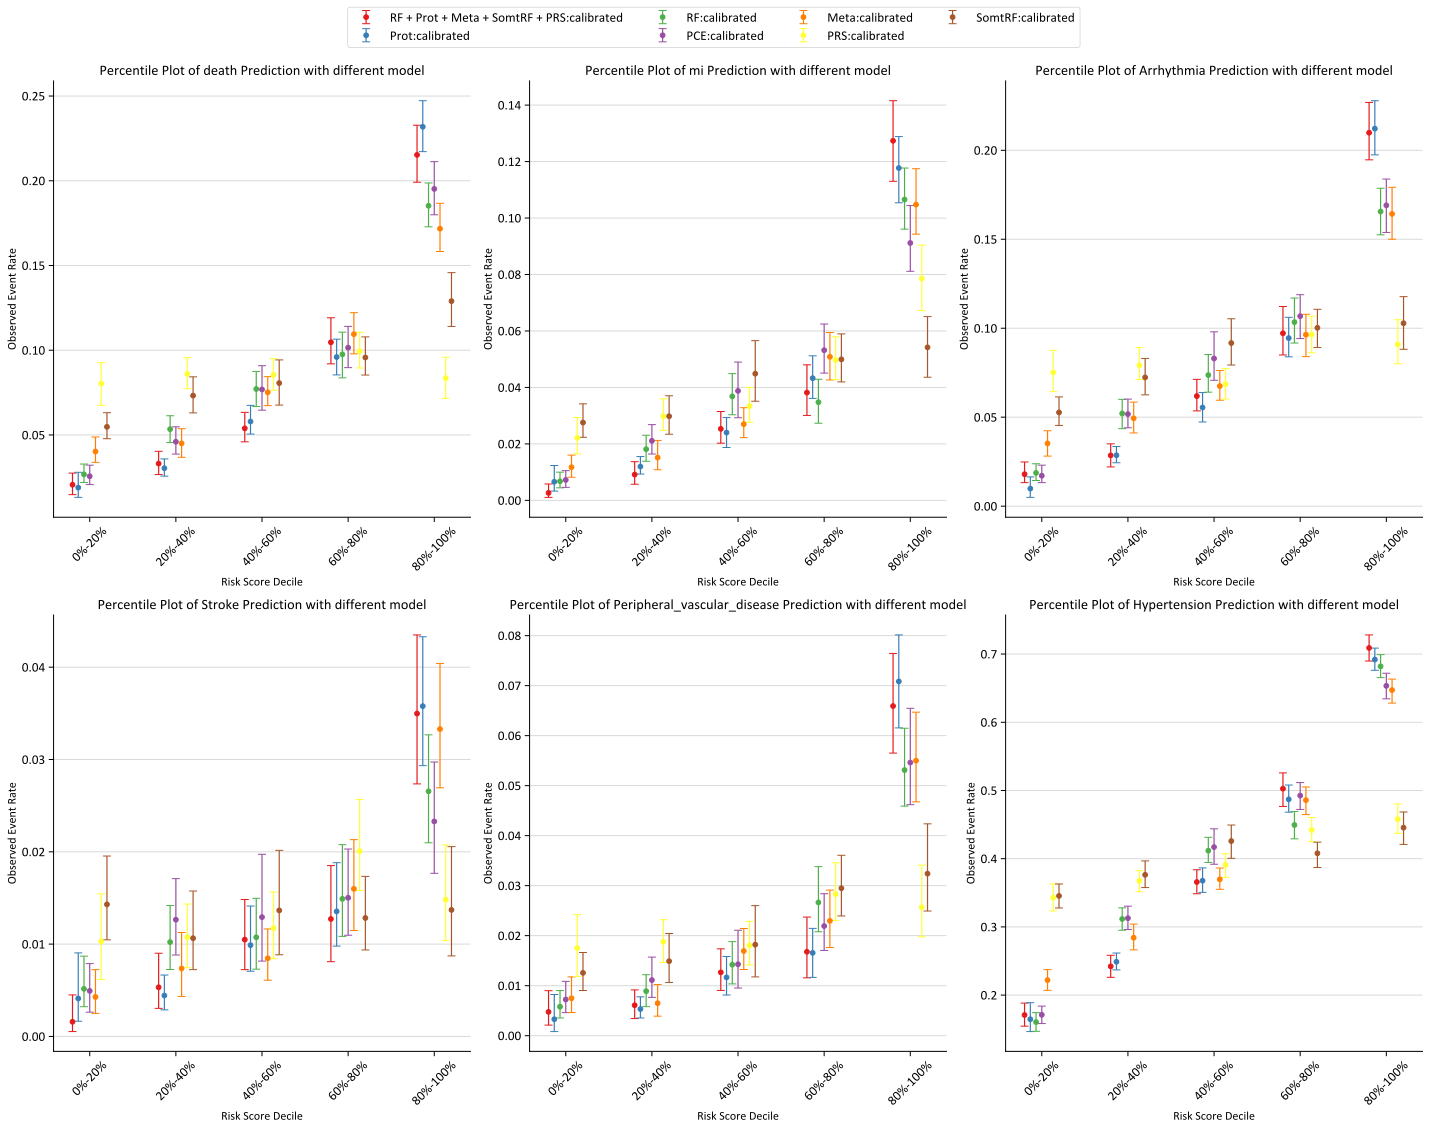

In [31]:
tgt_list = [
    "death",
    "mi",
    "Arrhythmia",
    "Stroke",
    "Peripheral_vascular_disease",
    "Hypertension",
]
# method_list = ["RF", "PRS"] + calibration_df.query("group == '+ RF + PRS'")[
#     "name"
# ].unique().tolist()
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()
for idx in range(len(tgt_list)):
    ax1, tgt = axes[idx], tgt_list[idx]
    plt_data = score[[tgt] + [f"{i}:calibrated" for i in method_list]].melt(
        value_vars=[f"{i}:calibrated" for i in method_list],
        id_vars=[tgt],
        value_name="score",
        var_name="method",
    )

    calibration_dot_plot(
        data=plt_data, y_true=tgt, y_pred="score", hue="method", ax=ax1, k=5
    )
    ax1.set_title(f"Percentile Plot of {tgt} Prediction with different model")

    plt.setp(ax1.get_xticklabels(), rotation=45)
    if idx == 0:
        fig.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=4)
    ax1.legend("", frameon=False)
fig.tight_layout()

In [92]:
plt_data.groupby("method").apply(lambda x: x.dropna()["death"].value_counts())

death,0,1
method,,
Meta:calibrated,12780,1227
PCE:calibrated,11025,1047
PRS:calibrated,12731,1223
Prot:calibrated,12780,1227
RF + Prot + Meta + SomtRF + PRS:calibrated,10305,936
RF:calibrated,12780,1227
SomtRF:calibrated,10305,936


## 生存分析

### KM Plot

In [44]:
def add_k_year_follow(df, k=5, unit="month", follow_year_col = "year_of_cad_after_recuit"):

    assert unit in ["month", "year", "day"]

    E = f"{k}_years_cad"
    T = f"{k}_years_cad_{unit}"

    df[E] = (df[follow_year_col] <= k).astype(int)

    def survive_time(x):
        cad_date = x["cad_date"]
        death_date = x["death_date"]
        recuit_date = x["recuit_date"]

        if x[E] == 1:  # K年内得了冠心病
            days = (cad_date - recuit_date).days
        elif x[E] == 0:  # K年没有冠心病
            if pd.notnull(death_date):
                death_times_after_recuit = (death_date - recuit_date).days
                if death_times_after_recuit <= k * 365:  # K年内死亡了
                    days = death_times_after_recuit
                else:
                    days = k * 365  # 死亡了，但是没在k年内
            else:
                days = k * 365  # 直到隨訪結束也沒有死
        if unit == "month":
            return days / 30
        elif unit == "year":
            return days / 365
        else:
            return days

    df[T] = df.apply(survive_time, axis=1)
    return df, E, T


score["age_bin"] = pd.cut(
    score["age"],
    bins=[0, 60, 65, 70],
    labels=["0-60", "60-65", "65-70"],
)

# show age bin dist
score.groupby(["age_bin"]).value_counts(["incident_cad"])

score, E_3, T_3 = add_k_year_follow(score, k=3)
score, E_5, T_5 = add_k_year_follow(score, k=5)
score, E_10, T_10 = add_k_year_follow(score, k=10)

In [60]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols
from lifelines import KaplanMeierFitter


def plot_KM_QT_k_percentile(plt_data, var, E, T, k=2, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))

    plt_data = plt_data[[var, E, T]].copy()
    plt_data[var].rank(pct=True, ascending=True)
    plt_data[f"{var}_bin"] = pd.cut(
        plt_data[var].rank(pct=True, ascending=True), bins=k
    )
    texts = ""
    for name, grouped_df in plt_data.groupby(f"{var}_bin"):
        kmf = KaplanMeierFitter()
        kmf.fit(grouped_df[T], event_observed=grouped_df[E], label=name)

        kmf.plot_cumulative_density(ax=ax)
        texts += f"{name} have {E} {grouped_df[grouped_df[E] == 1].shape[0]}\n"

    ax.set_title(f"{var} vs {T} and {E} at each bin", fontsize=8)
    ax.legend(title=f"{var}_percentile", fontsize=8)

    ax.text(
        0.99,
        0.99,
        texts,
        fontsize=12,
        ha="right",
        va="top",
        transform=ax.transAxes,
        multialignment="left",
    )
    return ax


def plot_KM_percentile(plt_data, var, E, T, ax=None, palette=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    if palette is None:
        palette = sns.palettes.color_palette("Set1", n_colors=3)
    else:
        if isinstance(palette, str):
            palette = sns.palettes.color_palette(palette, n_colors=3)
        elif not hasattr(palette, "__iter__"):
            raise ValueError("palette should be a iterable or string")
    k = 10
    plt_data = plt_data[[var, E, T]].copy()
    plt_data[var].rank(pct=True, ascending=True)
    plt_data[f"{var}_bin"] = pd.cut(
        plt_data[var].rank(pct=True, ascending=True), bins=k, ordered=True
    )
    texts = ""
    bins = plt_data[f"{var}_bin"].cat.categories

    to_plot_bin = [bins[0], bins[5], bins[-1]]
    to_plot_bin_name = ["Bottom 10%", "Middle 10%", "Top 10%"]

    for idx, name in enumerate(to_plot_bin):
        # print(f"{var}_bin == @name")

        # grouped_df = plt_data.query(f"{var}_bin == @name")
        grouped_df = plt_data[plt_data[f"{var}_bin"] == name]
        # print(grouped_df)
        kmf = KaplanMeierFitter()
        kmf.fit(
            grouped_df[T], event_observed=grouped_df[E], label=to_plot_bin_name[idx]
        )

        kmf.plot_cumulative_density(ax=ax, color=palette[idx], **kwargs)
        texts += f"{to_plot_bin_name[idx]} have {E} {grouped_df[grouped_df[E] == 1].shape[0]}\n"

    ax.set_title(f"{var} vs {T} and {E} at each bin", fontsize=8)
    ax.legend(title=f"{var}_percentile", fontsize=8)

    # ax.text(
    #     0.99,
    #     0.99,
    #     texts,
    #     fontsize=12,
    #     ha="right",
    #     va="top",
    #     transform=ax.transAxes,
    #     multialignment="left",
    # )
    return ax

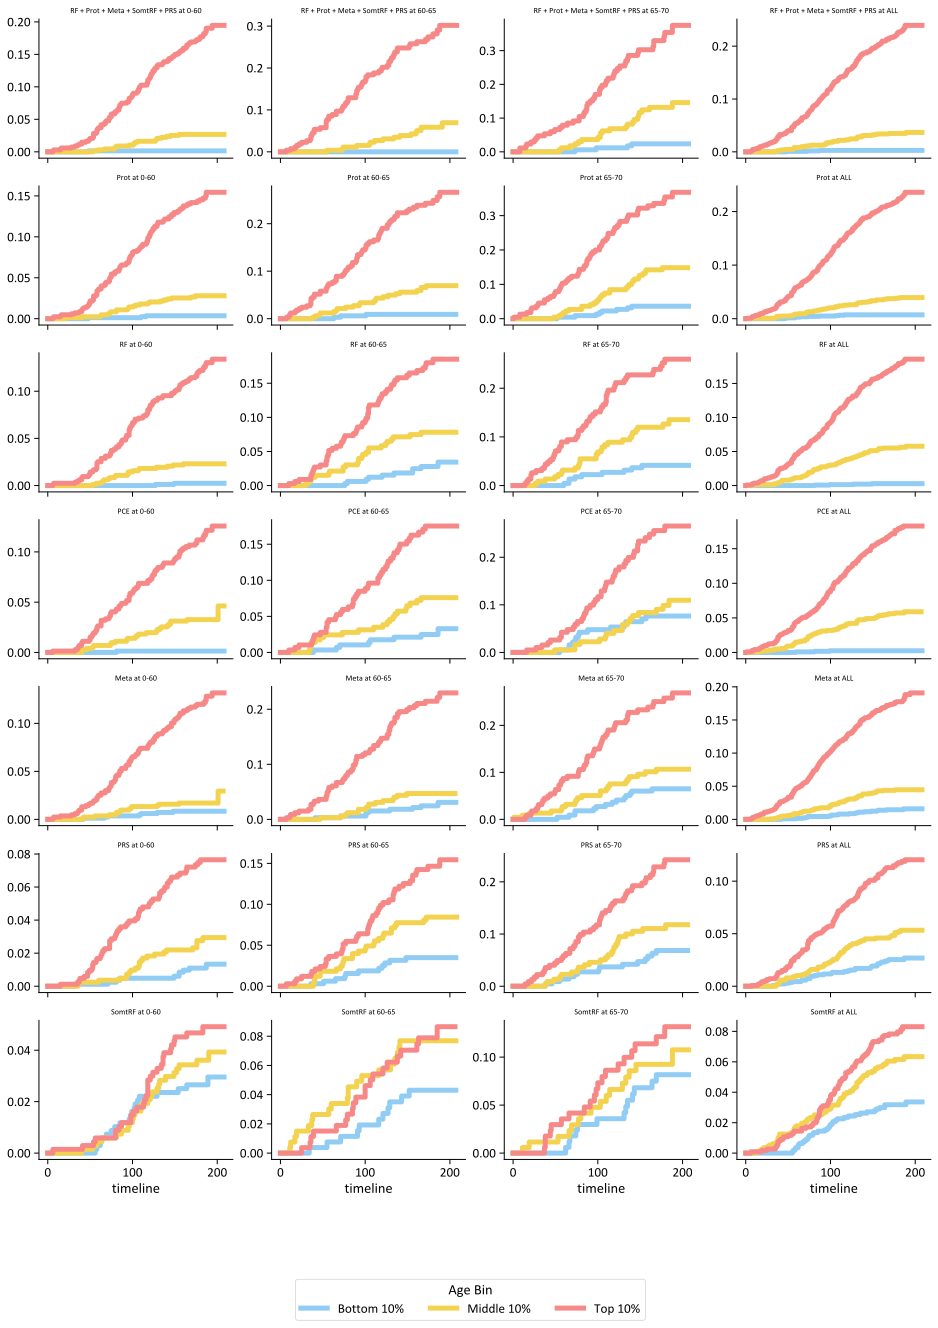

In [64]:
E = "incident_cad"
T = "future_cad_time_months"
# method_list = ["ProtLassoRS", "PRS", "RF"]
plt_group = risk_strat_group_need
method_list = calibration_df.query("group.isin(@plt_group)")["name"].unique().tolist()

age_bin_list = ["0-60", "60-65", "65-70", "ALL"]
nrow = len(method_list)
ncol = len(age_bin_list)

fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 3), sharex=True)
# axes = axes.flatten()
for row_idx, method in enumerate(method_list):
    for col_idx, age_bin in enumerate(age_bin_list):
        if age_bin == "ALL":
            tmp_df = score
        else:
            tmp_df = score.query("age_bin == @age_bin")

        tmp_df = tmp_df[["eid", E, T, method]].copy().dropna()
        ax = axes[row_idx, col_idx]
        plot_KM_percentile(
            tmp_df,
            method,
            E,
            T,
            ax=ax,
            palette=["#90ccf4", "#f3d250", "#f78888"],
            lw=5,
            ci_show=False,
        )
        ax.legend("", frameon=False)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_title(f"{method} at {age_bin}", fontsize=8)
        if row_idx == 0 and col_idx == 0:
            # ax.set_title(f"{method} at {age_bin}")
            fig.legend(
                title="Age Bin", loc="upper center", bbox_to_anchor=(0.5, 0.05), ncol=4
            )
# fig.tight_layout()

### c-index 不同年龄段的图

In [65]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
age_bin_result = []
for age_bin in score["age_bin"].unique().tolist() + ["ALL"]:
    if age_bin == "ALL":
        age_bin_df = score.copy()
    else:
        age_bin_df = score.query("age_bin == @age_bin")

    diff_methods_survival_list = []
    print(f"**************************age_bin:{age_bin}*************************")
    for E, T in [
        [E_3, T_3],
        [E_5, T_5],
        [E_10, T_10],
        ["incident_cad", "future_cad_time_months"],
    ]:
        print(f"**************************E:{E} and T:{T}*************************")
        current_surivival_list = []
        for method in methods:
            var = f"{method}"
            tmp_df = age_bin_df[[var, E, T]].dropna().reset_index(drop=True)
            try:
                cph.fit(tmp_df, duration_col=T, event_col=E)
                summary_df = cph.summary
                summary_df["N"] = tmp_df.shape[0]
                summary_df["n_control"] = (tmp_df[E] == 0).sum()
                summary_df["n_case"] = (tmp_df[E] == 1).sum()
                summary_df["c_index"] = cph.concordance_index_
                current_surivival_list.append(summary_df.loc[[var]])
                print(
                    f"pvalue of {var}: {cph.summary['p'][var]}, < 0.05 {cph.summary['p'][var] < 0.05}"
                )
            except:
                print(f"Error in {var}")
                continue

        current_stat = pd.concat(current_surivival_list).reset_index(drop=False)
        current_stat = generate_states_cols(current_stat, pvalue_col="p")
        current_stat["formatted_qval"] = current_stat["p"].apply(lambda x: f"{x:.2e}")
        current_stat["label"] = T
        diff_methods_survival_list.append(current_stat)
        print(f"**************************E:{E} and T:{T}*************************")

    diff_methods_survival_df = pd.concat(diff_methods_survival_list).reset_index(
        drop=True
    )
    diff_methods_survival_df["age_bin"] = age_bin

    age_bin_result.append(diff_methods_survival_df)
Cox_compared_df = pd.concat(age_bin_result).reset_index(drop=True)

**************************age_bin:0-60*************************
**************************E:3_years_cad and T:3_years_cad_month*************************
pvalue of RF + Prot + Meta + SomtRF + PRS: 2.267049991727813e-24, < 0.05 True
pvalue of RF + Prot + Meta + PRS: 2.1860024292835512e-23, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF: 4.034121183267995e-22, < 0.05 True
pvalue of RF + Prot + Meta: 9.82196658093906e-22, < 0.05 True
pvalue of RF + Prot: 1.3226491482265798e-21, < 0.05 True
pvalue of Meta + Prot: 2.3645499676324276e-21, < 0.05 True
pvalue of RF + PRS: 2.31787525933893e-18, < 0.05 True
pvalue of Prot: 9.997035707636977e-22, < 0.05 True
pvalue of RF + Meta: 5.320215453937604e-17, < 0.05 True
pvalue of RF + SomtRF: 1.7994688575865797e-15, < 0.05 True
pvalue of RF: 9.187888127268127e-15, < 0.05 True
pvalue of PCE: 1.3419625252348523e-16, < 0.05 True
pvalue of Meta: 3.238507544475475e-12, < 0.05 True
pvalue of PRS: 0.0001955190976614877, < 0.05 True
pvalue of SomtRF: 0.10650032

In [66]:
def split_method(x):
    split_x = x.split(" ")
    if len(split_x) == 1:
        return "base"
    else:
        return " ".join(x.split(" ")[1:])


Cox_compared_df = Cox_compared_df.rename(columns={"covariate": "method"})
Cox_compared_df["group"] = Cox_compared_df["method"].apply(split_method)
Cox_compared_df["c_index"] = Cox_compared_df["c_index"].astype(float)
Cox_compared_df

,method,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,n_control,n_case,c_index,LOG10P,q_values,reject,markers,formatted_qval,label,age_bin,group
0,RF + Prot + Meta + SomtRF + PRS,20.508071,8.063841e+08,2.013166,16.562339,24.453803,1.559310e+07,4.170150e+10,0.0,10.186977,2.267050e-24,78.545458,6834,6794,40,0.885044,23.644539,3.400575e-23,True,***,2.27e-24,3_years_cad_month,0-60,+ Prot + Meta + SomtRF + PRS
1,RF + Prot + Meta + PRS,18.945414,1.690008e+08,1.901346,15.218844,22.671983,4.068742e+06,7.019679e+09,0.0,9.964212,2.186002e-23,75.276051,8373,8328,45,0.859604,22.660349,1.639502e-22,True,***,2.19e-23,3_years_cad_month,0-60,+ Prot + Meta + PRS
2,RF + Prot + Meta + SomtRF,19.693977,3.572610e+08,2.036554,15.702404,23.685550,6.598839e+06,1.934210e+10,0.0,9.670245,4.034121e-22,71.070164,6834,6794,40,0.860131,21.394251,2.017061e-21,True,***,4.03e-22,3_years_cad_month,0-60,+ Prot + Meta + SomtRF
3,RF + Prot + Meta,18.360863,9.419358e+07,1.916831,14.603942,22.117783,2.199943e+06,4.033027e+09,0.0,9.578757,9.821967e-22,69.786406,8403,8358,45,0.841726,21.007802,2.999111e-21,True,***,9.82e-22,3_years_cad_month,0-60,+ Prot + Meta
4,RF + Prot,18.728053,1.359848e+08,1.961470,14.883643,22.572464,2.909939e+06,6.354722e+09,0.0,9.547968,1.322649e-21,69.357060,8403,8358,45,0.840147,20.878555,3.306623e-21,True,***,1.32e-21,3_years_cad_month,0-60,+ Prot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,RF,18.248033,8.414343e+07,0.702562,16.871037,19.625029,2.123237e+07,3.334586e+08,0.0,25.973562,9.853989e-149,491.666578,14007,13216,791,0.749065,148.006388,1.478098e-148,True,***,9.85e-149,future_cad_time_months,ALL,base
236,PCE,7.006128,1.103374e+03,0.302500,6.413239,7.599017,6.098657e+02,1.996232e+03,0.0,23.160763,1.132528e-118,391.807968,12072,11384,688,0.738241,117.945951,1.415660e-118,True,***,1.13e-118,future_cad_time_months,ALL,base
237,Meta,17.300827,3.263274e+07,0.677988,15.971994,18.629659,8.640701e+06,1.232418e+08,0.0,25.517887,1.248171e-143,474.715903,14007,13216,791,0.730372,142.903726,1.702051e-143,True,***,1.25e-143,future_cad_time_months,ALL,base
238,PRS,1.107981,3.028239e+00,0.083888,0.943564,1.272398,2.569121e+00,3.569403e+00,0.0,13.207880,7.901908e-40,129.894923,13954,13165,789,0.633828,39.102268,8.466330e-40,True,***,7.90e-40,future_cad_time_months,ALL,base


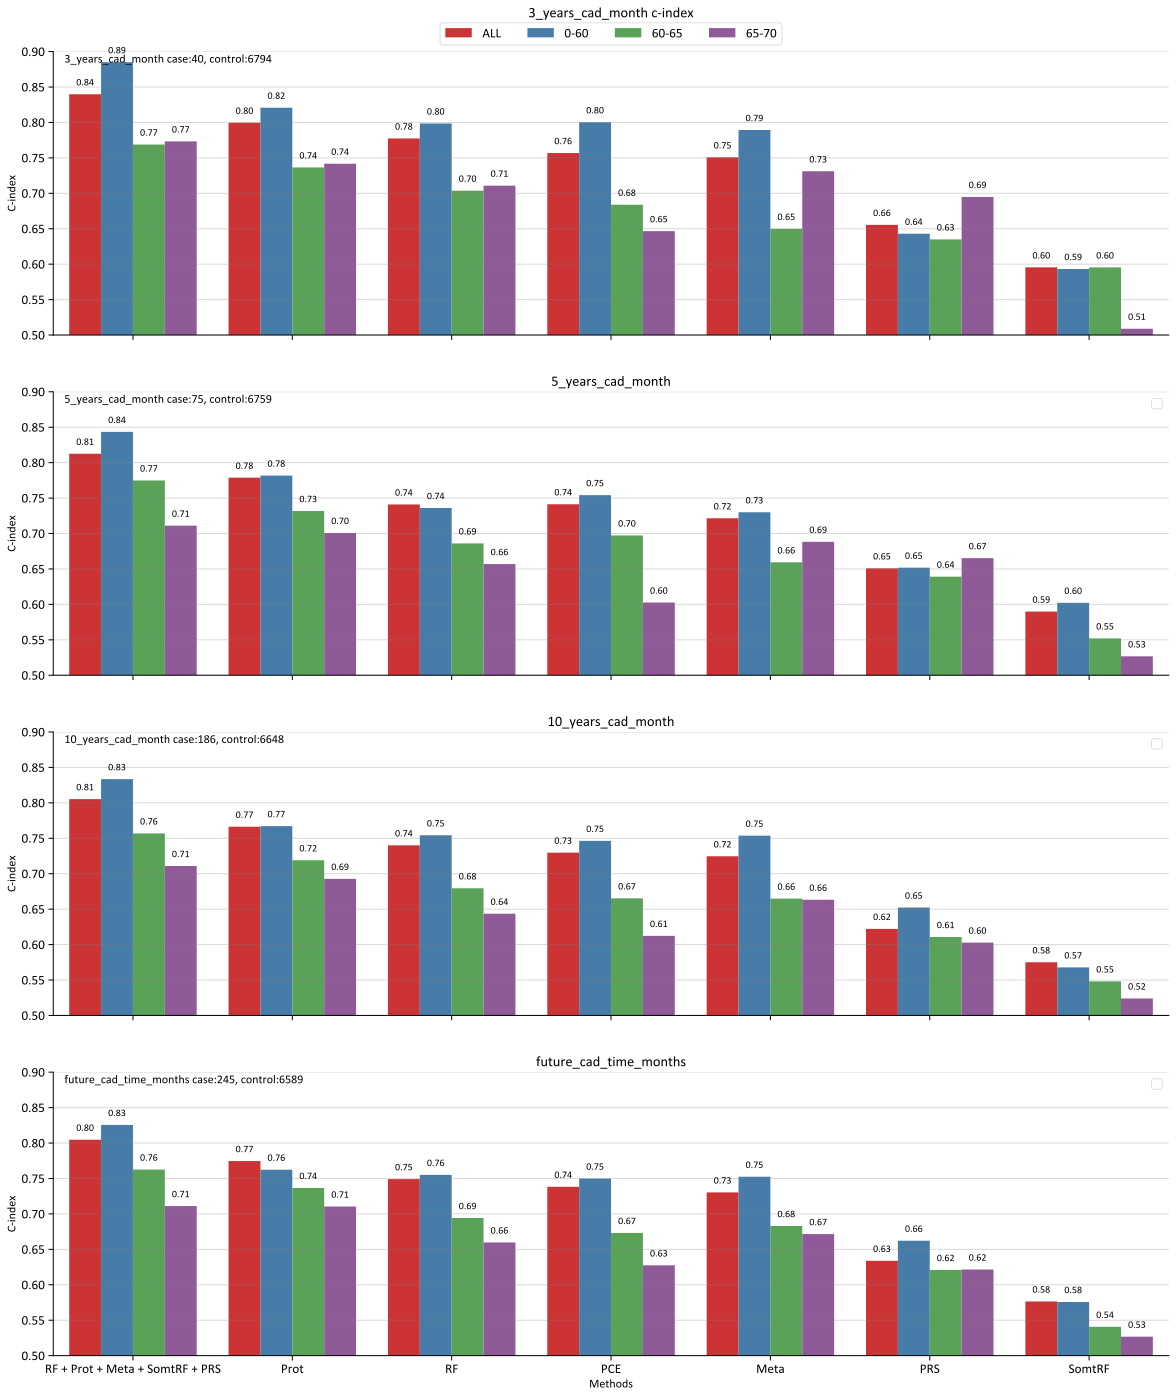

In [68]:
hue_order = ["ALL", "0-60", "60-65", "65-70"]
palette = sns.color_palette("Set1", n_colors=len(hue_order))

nrow = Cox_compared_df["label"].unique().shape[0]

fig, axes = plt.subplots(nrow, figsize=(20, nrow * 6), sharex=True)
axes = axes.flatten()

for idx, tgt in enumerate(Cox_compared_df["label"].unique()):
    ax = axes[idx]
    plt_data = Cox_compared_df.query("label == @tgt")
    sns.barplot(
        data=plt_data,
        x="method",
        y="c_index",
        hue="age_bin",
        ax=ax,
        palette=palette,
        order=method_list,
        hue_order=hue_order,
    )
    ax.legend(loc="upper left")
    ax.yaxis.grid(color="grey", linestyle="-", linewidth=1, alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Methods", fontsize=12)
    ax.set_ylabel("C-index", fontsize=12)

    texts = ""
    for i, row in plt_data.groupby("label"):
        label_case_num = row["n_case"].values[0]
        label_control_num = row["n_control"].values[0]
        texts += f"{i} case:{label_case_num}, control:{label_control_num}\n"
    ax.text(
        0.01,
        0.99,
        texts,
        fontsize=12,
        ha="left",
        va="top",
        transform=ax.transAxes,
    )
    for patch in ax.patches:
        if patch.get_height() > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                patch.get_height() + 0.01,
                f"{patch.get_height():.2f}",
                ha="center",
                va="bottom",
            )
    ax.set_ylim(0.5, 0.9)
    if idx == 0:
        ax.set_title(f"{tgt} c-index")
        ax.legend(bbox_to_anchor=(0.5, 1.0), loc="lower center", ncol=len(hue_order))
        ax.set_title(f"{tgt} c-index", x=0.5, y=1.1)

    else:
        ax.legend("")
        ax.set_title(f"{tgt}")

### time C-index plot

In [73]:
timeplot_df = score[
    [
        "eid",
        "incident_cad",
        "future_cad_time_months",
        "year_of_cad_after_recuit",
        "cad_date",
        "death_date",
        "recuit_date",
    ]
    + methods
]

time_K_list = []
for time_k in range(1, 11):
    timeplot_df, E, T = add_k_year_follow(timeplot_df, k=time_k)
    time_K_list.append((E, T))

timeplot_df

,eid,incident_cad,future_cad_time_months,year_of_cad_after_recuit,cad_date,death_date,recuit_date,RF + Prot + Meta + SomtRF + PRS,RF + Prot + Meta + PRS,RF + Prot + Meta + SomtRF,RF + Prot + Meta,RF + Prot,Meta + Prot,RF + PRS,Prot,RF + Meta,RF + SomtRF,RF,PCE,Meta,PRS,SomtRF,1_years_cad,1_years_cad_month,2_years_cad,2_years_cad_month,3_years_cad,3_years_cad_month,4_years_cad,4_years_cad_month,5_years_cad,5_years_cad_month,6_years_cad,6_years_cad_month,7_years_cad,7_years_cad_month,8_years_cad,8_years_cad_month,9_years_cad,9_years_cad_month,10_years_cad,10_years_cad_month
0,3001252,0.0,193.0,NaN,NaT,NaT,2008-07-03,0.019549,0.018958,0.021416,0.020907,0.019803,0.020832,0.035636,0.023704,0.039687,0.046494,0.035463,0.022013,0.044595,0.951761,0.068905,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
1,2285991,0.0,178.0,NaN,NaT,NaT,2009-10-15,0.071237,0.070981,0.068595,0.068485,0.064176,0.069866,0.062553,0.065112,0.071917,0.059005,0.055194,0.081285,0.080421,1.072419,0.049260,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
2,3881299,0.0,197.0,NaN,NaT,NaT,2008-03-06,0.012625,0.012237,0.006607,0.006767,0.005513,0.010159,0.012086,0.015569,0.013017,0.012882,0.005015,0.033365,0.033065,1.123179,0.064647,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
3,1460758,0.0,170.0,NaN,NaT,NaT,2010-05-28,NaN,0.055506,NaN,0.031846,0.033188,0.030088,0.077097,0.034501,0.045904,NaN,0.049265,NaN,0.038681,1.486070,NaN,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
4,5252794,0.0,206.0,NaN,NaT,NaT,2007-06-29,NaN,0.090814,NaN,0.114601,0.112136,0.115488,0.061559,0.109006,0.094577,NaN,0.080508,NaN,0.090933,0.520928,NaN,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14434,3393732,0.0,173.0,NaN,NaT,NaT,2010-03-05,0.065090,0.065320,0.060430,0.058397,0.055941,0.050984,0.118551,0.045650,0.106961,0.122249,0.106110,0.193339,0.081581,1.116149,0.073392,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
14435,3318274,0.0,200.0,NaN,NaT,NaT,2007-12-19,0.080905,0.082716,0.075440,0.072320,0.077649,0.056241,0.177623,0.056132,0.132599,0.171974,0.161058,0.092579,0.059724,1.136278,0.054656,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
14436,2627475,0.0,191.0,NaN,NaT,NaT,2008-09-24,0.126128,0.129205,0.099040,0.099443,0.104604,0.097734,0.116418,0.101421,0.070607,0.084126,0.079732,0.172946,0.046458,1.627796,0.047941,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667
14437,3775966,0.0,201.0,NaN,NaT,NaT,2007-11-22,-0.004868,-0.005318,-0.004441,-0.004063,-0.002238,-0.000708,-0.005641,0.009656,-0.004950,-0.013429,-0.004547,0.011851,0.011248,0.971605,0.025227,0,12.166667,0,24.333333,0,36.5,0,48.666667,0,60.833333,0,73.0,0,85.166667,0,97.333333,0,109.5,0,121.666667


In [96]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
to_plot_method = method_list
timeplot_df_cox_result = []

for method in to_plot_method:

    current_surivival_list = []
    for E, T in time_K_list:
        plt_df = timeplot_df[[method, E, T]].dropna().reset_index(drop=True)
        cph.fit(plt_df, duration_col=T, event_col=E)
        summary_df = cph.summary
        summary_df["N"] = plt_df.shape[0]
        summary_df["n_control"] = (plt_df[E] == 0).sum()
        summary_df["n_case"] = (plt_df[E] == 1).sum()
        summary_df["c_index"] = cph.concordance_index_
        summary_df["label"] = T
        summary_df["method"] = method
        current_surivival_list.append(summary_df.loc[[method]])
        print(
            f"pvalue of {method}: {cph.summary['p'][method]}, < 0.05 {cph.summary['p'][method] < 0.05}"
        )

    current_stat = pd.concat(current_surivival_list).reset_index(drop=False)

    timeplot_df_cox_result.append(current_stat)
    print(f"**************************{method} *************************")

pvalue of RF + Prot + Meta + SomtRF + PRS: 7.604288734269081e-16, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 2.7835898135631355e-37, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 1.0864150265424916e-50, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 5.227073382781472e-60, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 1.465608679366245e-82, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 1.2241987344340067e-94, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 3.0910940147617895e-115, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 1.0741310900416003e-138, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 2.4118656704741906e-157, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 2.0899323103139478e-169, < 0.05 True
**************************RF + Prot + Meta + SomtRF + PRS *************************
pvalue of Prot: 6.5777369577094525e-15, < 0.05 True
pvalue of Prot: 1.6729372701031223e-35, < 0.05 True
pvalue of Prot: 2.032

In [97]:
timeplot_df_cox_result_df = pd.concat(timeplot_df_cox_result).reset_index(drop=True)
timeplot_df_cox_result_df = generate_states_cols(
    timeplot_df_cox_result_df, pvalue_col="p"
)
timeplot_df_cox_result_df["formatted_qval"] = timeplot_df_cox_result_df["p"].apply(
    lambda x: f"{x:.2e}"
)
timeplot_df_cox_result_df["label"] = (
    timeplot_df_cox_result_df["label"]
    .astype("category")
    .cat.set_categories([f"{i}_years_cad_month" for i in range(1, 11)], ordered=True)
)

In [98]:
timeplot_df_cox_result_df

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,n_control,n_case,c_index,label,method,LOG10P,q_values,reject,markers,formatted_qval
0,RF + Prot + Meta + SomtRF + PRS,15.134561,3.739869e+06,1.877643,11.454448,18.814674,9.431999e+04,1.482891e+08,0.0,8.060404,7.604289e-16,50.224036,11241,11208,33,0.820979,1_years_cad_month,RF + Prot + Meta + SomtRF + PRS,15.118941,1.043726e-15,True,***,7.60e-16
1,RF + Prot + Meta + SomtRF + PRS,16.561258,1.557625e+07,1.298023,14.017178,19.105337,1.223442e+06,1.983090e+08,0.0,12.758828,2.783590e-37,121.434393,11241,11173,68,0.845133,2_years_cad_month,RF + Prot + Meta + SomtRF + PRS,36.555395,5.567180e-37,True,***,2.78e-37
2,RF + Prot + Meta + SomtRF + PRS,16.029671,9.153725e+06,1.070503,13.931525,18.127818,1.123012e+06,7.461246e+07,0.0,14.973968,1.086415e-50,165.976829,11241,11136,105,0.839783,3_years_cad_month,RF + Prot + Meta + SomtRF + PRS,49.964004,2.622381e-50,True,***,1.09e-50
3,RF + Prot + Meta + SomtRF + PRS,15.288634,4.362843e+06,0.935726,13.454646,17.122623,6.970734e+05,2.730616e+07,0.0,16.338801,5.227073e-60,196.929682,11241,11097,144,0.817958,4_years_cad_month,RF + Prot + Meta + SomtRF + PRS,59.281741,1.524563e-59,True,***,5.23e-60
4,RF + Prot + Meta + SomtRF + PRS,15.363020,4.699751e+06,0.798160,13.798656,16.927384,9.832868e+05,2.246309e+07,0.0,19.248056,1.465609e-82,271.846604,11241,11037,204,0.812595,5_years_cad_month,RF + Prot + Meta + SomtRF + PRS,81.833982,6.412038e-82,True,***,1.47e-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SomtRF,22.059222,3.803631e+09,5.354102,11.565374,32.553070,1.053849e+05,1.372835e+14,0.0,4.120060,3.787739e-05,14.688303,11572,11322,250,0.582087,6_years_cad_month,SomtRF,4.421620,4.142840e-05,True,***,3.79e-05
66,SomtRF,21.697654,2.649546e+09,4.720519,12.445608,30.949701,2.541316e+05,2.762385e+13,0.0,4.596456,4.297386e-06,17.828109,11572,11249,323,0.581653,7_years_cad_month,SomtRF,5.366796,4.851887e-06,True,***,4.30e-06
67,SomtRF,22.262513,4.661080e+09,4.393493,13.651426,30.873600,8.486702e+05,2.559966e+13,0.0,5.067156,4.038029e-07,21.239846,11572,11201,371,0.582409,8_years_cad_month,SomtRF,6.393831,4.633803e-07,True,***,4.04e-07
68,SomtRF,22.399472,5.345239e+09,4.047744,14.466039,30.332905,1.916554e+06,1.490779e+13,0.0,5.533816,3.133372e-08,24.927709,11572,11135,437,0.580389,9_years_cad_month,SomtRF,7.503988,3.848001e-08,True,***,3.13e-08


Text(0.5, 0, 'age')

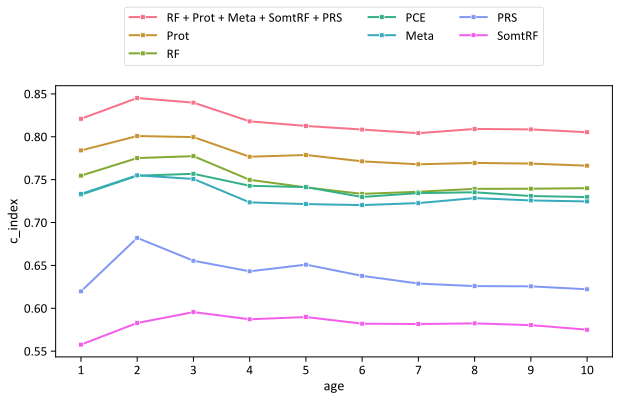

In [99]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(
    timeplot_df_cox_result_df,
    x="label",
    y="c_index",
    hue="method",
    ax=ax,
    lw=2,
    marker="s",
)
x_range = range(1, timeplot_df_cox_result_df["label"].unique().shape[0] + 1)
ax.set_xticklabels(x_range)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)
ax.set_xlabel("age")

### age c-index plot 

In [78]:
from lifelines import CoxPHFitter
from collections import defaultdict
from ppp_aging.model import generate_states_cols

# for all test
cph = CoxPHFitter()
to_plot_method = method_list

ageplot_df_cox_result = []

E = "incident_cad"
T = "future_cad_time_months"
for method in to_plot_method:
    current_surivival_list = []
    for age in sorted(score["age"].unique().tolist()):
        n_case = score.query("age == @age")[E].sum()
        if n_case < 10:
            continue
        plt_df = score.query("age == @age")[[method, E, T]].dropna().reset_index()

        cph.fit(plt_df, duration_col=T, event_col=E)
        summary_df = cph.summary
        summary_df["N"] = plt_df.shape[0]
        summary_df["age"] = age
        summary_df["n_control"] = (plt_df[E] == 0).sum()
        summary_df["n_case"] = n_case
        summary_df["c_index"] = cph.concordance_index_
        summary_df["label"] = T
        summary_df["method"] = method
        current_surivival_list.append(summary_df.loc[[method]])
        print(
            f"pvalue of {method}: {cph.summary['p'][method]}, < 0.05 {cph.summary['p'][method] < 0.05}"
        )

    current_stat = pd.concat(current_surivival_list).reset_index(drop=False)

    ageplot_df_cox_result.append(current_stat)
    print(f"**************************{age}: {method} *************************")

ageplot_df_cox_result_df = pd.concat(ageplot_df_cox_result).reset_index(drop=True)
ageplot_df_cox_result_df

pvalue of RF + Prot + Meta + SomtRF + PRS: 0.00010897510593068533, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 3.9254108136879854e-06, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 0.00019748202579636867, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 1.926130838023549e-06, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 5.606750038615347e-09, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 1.343395917500728e-07, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 5.0087307409175335e-05, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 0.0005560485487578745, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 0.0006126898373906483, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 6.082343379409792e-12, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 0.0025946683094317984, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 4.608592855515957e-10, < 0.05 True
pvalue of RF + Prot + Meta + SomtRF + PRS: 3.592365557467974

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),N,age,n_control,n_case,c_index,label,method
0,RF + Prot + Meta + SomtRF + PRS,21.978731,3.509470e+09,5.679718,10.846689,33.110773,5.136378e+04,2.397873e+14,0.0,3.869687,1.089751e-04,13.163714,300,47.0,290,11.0,0.853567,future_cad_time_months,RF + Prot + Meta + SomtRF + PRS
1,RF + Prot + Meta + SomtRF + PRS,37.193959,1.422758e+16,8.058851,21.398901,52.989017,1.965281e+09,1.030001e+23,0.0,4.615293,3.925411e-06,17.958725,295,48.0,285,10.0,0.890670,future_cad_time_months,RF + Prot + Meta + SomtRF + PRS
2,RF + Prot + Meta + SomtRF + PRS,17.729630,5.010492e+07,4.763192,8.393945,27.065315,4.420220e+03,5.679588e+11,0.0,3.722216,1.974820e-04,12.305991,308,49.0,298,11.0,0.793383,future_cad_time_months,RF + Prot + Meta + SomtRF + PRS
3,RF + Prot + Meta + SomtRF + PRS,23.386517,1.434284e+10,4.912077,13.759023,33.014011,9.450780e+05,2.176720e+14,0.0,4.761024,1.926131e-06,18.985863,350,50.0,337,14.0,0.858084,future_cad_time_months,RF + Prot + Meta + SomtRF + PRS
4,RF + Prot + Meta + SomtRF + PRS,20.444837,7.569721e+08,3.507986,13.569310,27.320364,7.817656e+05,7.329649e+11,0.0,5.828084,5.606750e-09,27.410188,333,52.0,319,17.0,0.839404,future_cad_time_months,RF + Prot + Meta + SomtRF + PRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,SomtRF,-1.068712,3.434507e-01,13.478412,-27.485914,25.348491,1.156163e-12,1.020257e+11,0.0,-0.079291,9.368015e-01,0.094185,436,66.0,386,57.0,0.496413,future_cad_time_months,SomtRF
157,SomtRF,19.317735,2.452368e+08,13.925143,-7.975045,46.610514,3.439394e-04,1.748595e+20,0.0,1.387256,1.653638e-01,2.596285,431,67.0,396,52.0,0.546235,future_cad_time_months,SomtRF
158,SomtRF,-13.323364,1.635824e-06,14.041113,-40.843440,14.196713,1.827761e-18,1.464044e+06,0.0,-0.948882,3.426805e-01,1.545064,378,68.0,338,51.0,0.564201,future_cad_time_months,SomtRF
159,SomtRF,26.565723,3.446250e+11,11.035719,4.936112,48.195333,1.392278e+02,8.530361e+20,0.0,2.407249,1.607321e-02,5.959198,434,69.0,382,74.0,0.614539,future_cad_time_months,SomtRF


Text(0.5, 0, 'age')

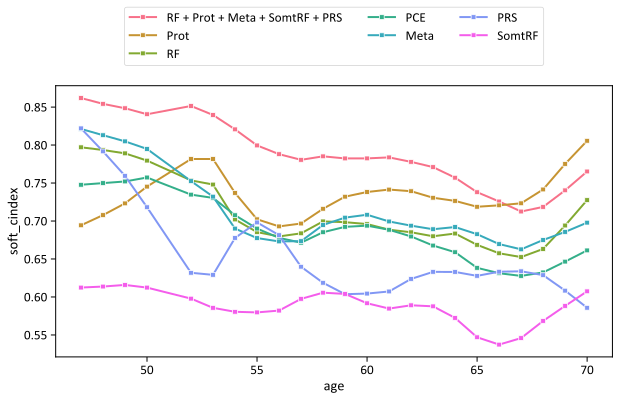

In [85]:
ageplot_df_cox_result_df = generate_states_cols(
    ageplot_df_cox_result_df, pvalue_col="p"
)
ageplot_df_cox_result_df["formatted_qval"] = ageplot_df_cox_result_df["p"].apply(
    lambda x: f"{x:.2e}"
)
ageplot_df_cox_result_df["age"].astype(int)

fig, ax = plt.subplots(figsize=(10, 5))
soft_rate = 0.3


def soft_lines(df, x, y, frac=0.3):
    lowess = sm.nonparametric.lowess(y, x, frac=frac)
    df["soft_cindex"] = lowess[:, 1]
    return df


plt_data = (
    ageplot_df_cox_result_df.groupby("method")
    .apply(lambda x: soft_lines(x, x["age"], x["c_index"], frac=soft_rate))
    .reset_index(drop=True)
)


sns.lineplot(plt_data, x="age", y="soft_cindex", hue="method", ax=ax, lw=2, marker="s")
# x_range = range(50, 71, 1)
# ax.set_xticks(x_range)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)
ax.set_xlabel("age")